In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_excel('Week-6-Files/simple-linear-regression.xlsx')
data

,Hydrocarbon level,O2
0,0.99,90.01
1,1.02,89.05
2,1.15,91.43
3,1.29,93.74
4,1.46,96.73
5,1.36,94.45
6,0.87,87.59
7,1.23,91.77
8,1.55,99.42
9,1.40,93.65


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


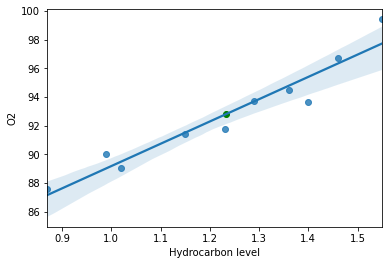

In [3]:
x = data['Hydrocarbon level']
y = data['O2']
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color = 'green')

Note: The best-fit regression line will **ALWAYS** pass through the point (x_mean,y_mean) i.e. the green point in the above figure.

Slope = Covar(x,y)/Var(x)

### Auto Sales Example

In [4]:
sales_data = pd.read_excel('Week-6-Files/simple-linear-regression-2.xlsx')
sales_data

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [5]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as s
import statsmodels.formula.api as sm

Text(0.5, 1.0, 'Sales in UK regions')

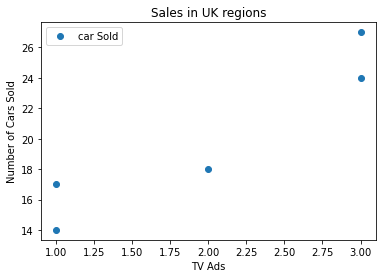

In [6]:
sales_data.plot('TV Ads','car Sold',style = 'o')
plt.ylabel('Number of Cars Sold')
plt.title('Sales in UK regions')

In [7]:
t = s.add_constant(sales_data['TV Ads'])
t

,const,TV Ads
0,1.0,1
1,1.0,3
2,1.0,2
3,1.0,1
4,1.0,3


In [8]:
model = s.OLS(sales_data['car Sold'],t)
result = model.fit()
result.summary()

C:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Fri, 08 Apr 2022   Prob (F-statistic):             0.0190
Time:                        15:37:14   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
TV Ads         5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


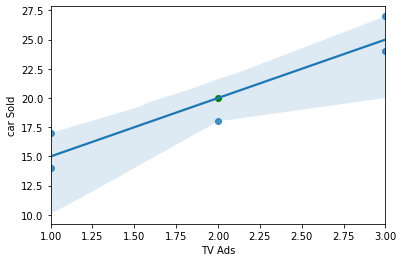

In [9]:
x = sales_data['TV Ads']
y = sales_data['car Sold']
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color = 'green')

The shaded area represents the **estimated confidence interval for the mean value of y i.e. E(y) for the corresponding value**

### Tensile Strength Example

In [10]:
tensile_data = pd.read_excel('Week-6-Files/simple-linear-regression-3.xls')
tensile_data

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02
5,63.5,30.82
6,71.4,35.40
7,53.4,31.26
8,82.5,32.18
9,67.3,33.42


[Text(0.5, 0, 'Hardness'),
 Text(0, 0.5, 'Tensile Strength'),
 Text(0.5, 1.0, 'Effect of Hardness on Tensile Strength')]

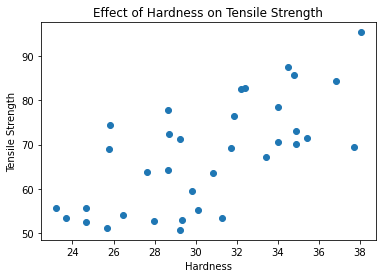

In [11]:
fig,axes = plt.subplots()
axes.scatter(tensile_data['Hardness'],tensile_data['Tensile strength'])
axes.set(xlabel = 'Hardness',ylabel = 'Tensile Strength', title = 'Effect of Hardness on Tensile Strength')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = tensile_data['Hardness'].values.reshape(-1,1)
y = tensile_data['Tensile strength'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 88)

In [14]:
reg = LinearRegression()
model = reg.fit(x_train,y_train)
print(f'Y intercept for linear regression: {model.intercept_}')

Y intercept for linear regression: [7.045691]


In [15]:
print(f'Slope for linear regression: {model.coef_}')

Slope for linear regression: [[1.99777401]]


In [16]:
y_pred = reg.predict(x_test)
y_pred

array([[73.81129842],
       [56.27084261],
       [64.28191639],
       [66.63928973],
       [70.37512713],
       [74.97000735],
       [71.73361345]])

In [17]:
from sklearn.metrics import mean_squared_error

The mean squared error is the average of the sum of the squared values of difference between actual value and predicted value. 

Refer - <https://medium.com/nothingaholic/understanding-the-mean-squared-error-df41e2c87958>

In [18]:
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')

Mean Squared Error: 35.71053398209997


R2 Score - <https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/>

In [19]:
print(f'R2 score for training set: {reg.score(x_train,y_train)}')

R2 score for training set: 0.4500146647765303


In [20]:
print(f'R2 score for test set: {reg.score(x_test,y_test)}')

R2 score for test set: 0.5362243730094254


#### Observations:

1. 45% of the variability in tensile strength is accounted for by hardness in the training set.
2. 53% of the variability in tensile strength is accounted for by hardness in the test set.


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


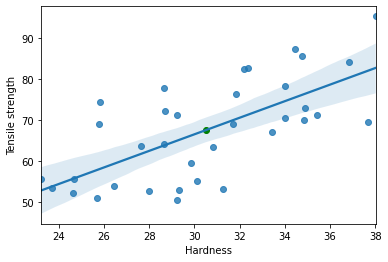

In [21]:
x = tensile_data['Hardness']
y = tensile_data['Tensile strength']
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color = 'green')